In [34]:
import pandas as pd

import numpy as np

import itertools
import os
pd.options.mode.chained_assignment = None
MIN_SUPPORT_PERCENT = 0.015
MIN_CONFIDENT_PERCENT = 0.5


In [2]:
onlineOrders = pd.read_csv('./data/onlineOrder_cleaned.csv')
onlineOrders = onlineOrders.applymap(str)

In [3]:
stocks_list = sorted(list(onlineOrders[['StockCode']].values[:,0]))

In [4]:
unique_stocks_list = []
for stock in stocks_list:
    if len(unique_stocks_list) == 0 or stock != unique_stocks_list[-1]:
        unique_stocks_list.append(stock)
print('number of stocks:', len(unique_stocks_list))

number of stocks: 4058


In [5]:
grouped_items = onlineOrders.groupby('InvoiceNo')['StockCode']
items = []
for item, method in grouped_items:
    items.append(sorted(list(method)))
all_df = pd.DataFrame(items)


In [7]:
cnt = 0
boolean_arrs_list = []
for index, row in all_df.iterrows():
    # print(row)
    cnt += 1
    if cnt % 300 == 0:
        print('\r {} %'.format(int(cnt * 100/ len(all_df))), end='')
    items = []
    boolean_arr = []
    for item in row:
        if item is not None:
            items.append(item)
    for column in unique_stocks_list:
        if column in items:
            boolean_arr.append(True)
        else:
            boolean_arr.append(False)            

    boolean_arrs_list.append(boolean_arr)
big_df = pd.DataFrame(boolean_arrs_list, columns=unique_stocks_list)


 1 %

 2 %

 4 %

 5 %

 6 %

 8 %

 9 %

 10 %

 12 %

 13 %

 14 %

 16 %

 17 %

 19 %

 20 %

 21 %

 23 %

 24 %

 25 %

 27 %

 28 %

 29 %

 31 %

 32 %

 33 %

 35 %

 36 %

 38 %

 39 %

 40 %

 42 %

 43 %

 44 %

 46 %

 47 %

 48 %

 50 %

 51 %

 53 %

 54 %

 55 %

 57 %

 58 %

 59 %

 61 %

 62 %

 63 %

 65 %

 66 %

 67 %

 69 %

 70 %

 72 %

 73 %

 74 %

 76 %

 77 %

 78 %

 80 %

 81 %

 82 %

 84 %

 85 %

 87 %

 88 %

 89 %

 91 %

 92 %

 93 %

 95 %

 96 %

 97 %

 99 %

In [9]:
number = 3
frequent_patterns = pd.read_csv('./output/0.01/l_{}.csv'.format(number))
frequent_patterns = frequent_patterns.applymap(str)

In [11]:
def split_X_Y(sel_index, items):
    X = items[sel_index]
    Y = [x for x in items if x != X]
    return X, Y
sel_index = 0
print(split_X_Y(sel_index, items))

('22138', ['22367', '22555', '22556', '22613', '22629', '22631', '22726', '22727', '22728', '22730', '22899', '23254', '23255', '23256'])


In [13]:
def rows_contains_items(dataframe, items):
    sel_row = np.alltrue(len(dataframe))
    for column in items:
        sel_row = sel_row & dataframe[column]
    contains_items_df = dataframe[sel_row]
    return contains_items_df

len(rows_contains_items(big_df, items))

1

In [79]:
contains_x_df = rows_contains_items(big_df, [X])
len(contains_x_df)

525

In [69]:
len(big_df)

22061

In [70]:
# print('support: {}, confident: {}'.format(len(contains_items_df) / len(big_df), len(contains_items_df) / len(contains_x_df)))

support: 0.010289651421059788, confident: 0.43238095238095237


In [15]:
stats = []
for index, item in frequent_patterns.iterrows():
    for i in range(len(frequent_patterns.columns)):
        X, Y = split_X_Y(i, item)
        have_x = rows_contains_items(big_df, [X])
        have_y = rows_contains_items(big_df, Y)
        have_both = rows_contains_items(big_df, [X]+Y)
        support = len(have_both) / len(big_df)
        confident = len(have_both) / len(have_x)
        lift = (len(have_both) / (len(have_x) * len(have_y))) * len(big_df)
        stats.append([X, Y, support, confident, lift])
stats = pd.DataFrame(stats, columns=['X', 'Y', 'support', 'confident', 'lift'])

In [129]:
stats['all_confidence'] = stats['support'] / max(stats['support'])

In [130]:
stats[(stats['confident'] > 0.8) & (stats['support'] > 0.02)].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>support</th>
      <th>confident</th>
      <th>lift</th>
      <th>all_confidence</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1013</th>
      <td>22698</td>
      <td>[22697]</td>
      <td>0.028693</td>
      <td>0.825293</td>
      <td>17.937731</td>
      <td>0.767273</td>
    </tr>
  </tbody>
</table>
</div>

In [133]:
stats[(stats['confident'] > 0.6) & (stats['support'] > 0.02)].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>support</th>
      <th>confident</th>
      <th>lift</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>451</th>
      <td>22698</td>
      <td>[22697, 22699]</td>
      <td>0.024568</td>
      <td>0.706649</td>
      <td>20.298685</td>
    </tr>
  </tbody>
</table>
</div>

In [134]:
stats[(stats['confident'] > 0.4) & (stats['support'] > 0.02)].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>support</th>
      <th>confident</th>
      <th>lift</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>450</th>
      <td>22697</td>
      <td>[22698, 22699]</td>
      <td>0.024568</td>
      <td>0.533990</td>
      <td>19.666706</td>
    </tr>
    <tr>
      <th>451</th>
      <td>22698</td>
      <td>[22697, 22699]</td>
      <td>0.024568</td>
      <td>0.706649</td>
      <td>20.298685</td>
    </tr>
    <tr>
      <th>452</th>
      <td>22699</td>
      <td>[22697, 22698]</td>
      <td>0.024568</td>
      <td>0.508443</td>
      <td>17.719994</td>
    </tr>
  </tbody>
</table>
</div>

In [147]:
stats[(stats['lift'] > 50)].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>support</th>
      <th>confident</th>
      <th>lift</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>472</th>
      <td>23171</td>
      <td>[23170, 23172]</td>
      <td>0.011559</td>
      <td>0.669291</td>
      <td>54.889354</td>
    </tr>
    <tr>
      <th>473</th>
      <td>23172</td>
      <td>[23170, 23171]</td>
      <td>0.011559</td>
      <td>0.836066</td>
      <td>57.819569</td>
    </tr>
  </tbody>
</table>
</div>

In [148]:
stats[(stats['confident'] > 0.70)].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>support</th>
      <th>confident</th>
      <th>lift</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>451</th>
      <td>22698</td>
      <td>[22697, 22699]</td>
      <td>0.024568</td>
      <td>0.706649</td>
      <td>20.298685</td>
    </tr>
    <tr>
      <th>473</th>
      <td>23172</td>
      <td>[23170, 23171]</td>
      <td>0.011559</td>
      <td>0.836066</td>
      <td>57.819569</td>
    </tr>
  </tbody>
</table>
</div>

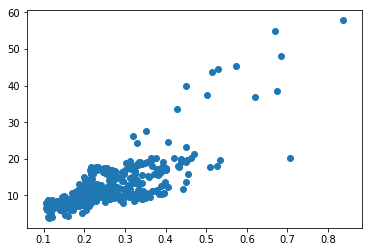

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(stats['confident'], stats['lift'])


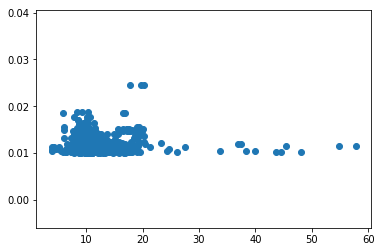

In [154]:
plt.scatter(stats['lift'], stats['support'])


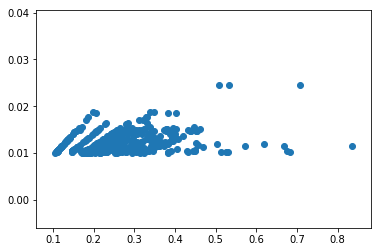

In [155]:
plt.scatter(stats['confident'], stats['support'])


In [20]:
l1 = []
l2 = []
for MIN_CONFIDENT in range(1, 10):
    m = MIN_CONFIDENT/10
    l1.append(m)
    l2.append((stats['confident'] > m).sum())
    

Text(0.5, 0, 'min confident')

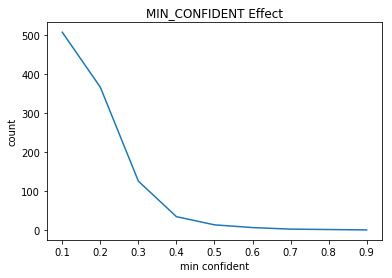

In [24]:
plt.plot(l1, l2)
plt.title('MIN_CONFIDENT Effect')
plt.ylabel('count')
plt.xlabel('min confident')

In [35]:
stats[stats['confident'] > MIN_CONFIDENT_PERCENT].count()

X            13
Y            13
support      13
confident    13
lift         13
dtype: int64

In [32]:
stats['confident'] > MIN_CONFIDENT_PERCENT

0       True
1      False
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
477    False
478     True
479    False
480    False
481    False
482    False
483    False
484    False
485    False
486    False
487    False
488    False
489    False
490    False
491    False
492    False
493    False
494    False
495    False
496    False
497    False
498    False
499    False
500    False
501    False
502    False
503    False
504    False
505    False
506    False
Name: confident, Length: 507, dtype: bool